In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [49]:
from tqdm import tqdm

In [50]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [51]:
df_train = pd.read_csv('df_with_outlier.csv')
df_test = pd.read_csv('df_test.csv')

In [52]:
df_train.head()

,name,duration_min,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,0.056710,0,0.489362,Funki Porcini,Hed Phone Sex,0.690,0.513,5,0.702298,...,0.281,0.6350,0.644920,241760,4.0,0.077164,0.064977,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",0.105897,0,0.000000,Siavash Amini,A Trail of Laughters,0.069,0.196,1,0.469376,...,0.360,0.0336,0.342800,444000,4.0,0.083968,0.071429,NaN,2.367412,iranian
2,Ondskapens Galakse,0.079024,0,0.031915,Kvelertak,Nattesferd,0.363,0.854,2,0.798793,...,0.262,0.4890,0.528865,333507,4.0,0.088732,0.074654,NaN,3.700483,black-metal
3,Can't Look Away,0.063530,0,0.244681,The Wood Brothers,One Drop of Truth,0.523,0.585,5,0.833678,...,0.117,0.3850,0.638839,269800,4.0,0.084241,0.071429,0.469,1.279305,bluegrass
4,Thunderground,0.072736,0,0.265957,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,0.724866,...,0.299,0.6370,0.652788,307652,4.0,0.099755,0.084332,NaN,4.067086,happy


In [53]:
objects = df_train.select_dtypes(include='object').columns

In [54]:
to_drop = list(objects)+['processing','popularity_confidence','features_duration_ms']
to_drop

['name',
 'artists',
 'album_name',
 'genre',
 'processing',
 'popularity_confidence',
 'features_duration_ms']

In [55]:
to_drop = list(objects)+['processing','popularity_confidence','features_duration_ms']
X_train, y_train, X_test, y_test = df_train.drop(columns=to_drop), df_train['genre'], \
                                    df_test.drop(columns=to_drop), df_test['genre']   
attributes = X_train.columns

In [56]:
df = X_train.copy()
df['genre'] = y_train
df[df['genre'] == 'afrobeat'].describe()

,duration_min,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.060116,0.018667,0.267064,0.631279,0.675015,5.372000,0.783975,0.562667,0.079777,0.274824,0.256546,0.196136,0.632641,0.539821,3.924000,0.068302,0.059257
std,0.025428,0.135435,0.145340,0.154227,0.197219,3.559754,0.073836,0.496388,0.089363,0.277762,0.363029,0.196053,0.259266,0.122059,0.370234,0.032249,0.030698
min,0.005652,0.000000,0.000000,0.000000,0.001470,0.000000,0.123142,0.000000,0.000000,0.000007,0.000000,0.011800,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045573,0.000000,0.191489,0.538000,0.569250,2.000000,0.763210,0.000000,0.036600,0.037325,0.000005,0.088425,0.455250,0.453069,4.000000,0.047224,0.040092
50%,0.055922,0.000000,0.234043,0.659000,0.715000,6.000000,0.799315,1.000000,0.049050,0.166000,0.003795,0.119000,0.689500,0.535128,4.000000,0.062058,0.052995
75%,0.068555,0.000000,0.329787,0.744750,0.826000,8.750000,0.824739,1.000000,0.079875,0.452000,0.655750,0.207750,0.850000,0.616058,4.000000,0.080838,0.069124
max,0.352512,1.000000,0.829787,0.974000,0.995000,11.000000,0.894585,1.000000,0.924000,0.996000,0.999000,0.992000,0.995000,0.907616,5.000000,0.356832,0.402304


In [39]:
df[df['genre'] == 'bluegrass'].describe()

,duration_min,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.052474,0.004000,0.284454,0.538100,0.537173,5.438667,0.754413,0.874667,0.041848,0.539167,0.132831,0.222549,0.632191,0.568278,3.912000,0.062263,0.054013
std,0.021651,0.063161,0.125489,0.114266,0.198736,3.487280,0.063257,0.331317,0.032035,0.266438,0.285017,0.205700,0.235951,0.120684,0.347011,0.029068,0.026021
min,0.007854,0.000000,0.000000,0.234000,0.018500,0.000000,0.483782,0.000000,0.024800,0.000058,0.000000,0.011600,0.038200,0.296701,1.000000,0.006668,0.005069
25%,0.039657,0.000000,0.234043,0.458250,0.402250,2.000000,0.716643,1.000000,0.030200,0.335000,0.000013,0.103000,0.470000,0.479993,4.000000,0.043958,0.037327
50%,0.048720,0.000000,0.265957,0.545000,0.536500,5.500000,0.764733,1.000000,0.033300,0.583500,0.000585,0.139500,0.660500,0.557148,4.000000,0.055729,0.047465
75%,0.060387,0.000000,0.319149,0.613750,0.685000,9.000000,0.801298,1.000000,0.040000,0.763750,0.039825,0.263000,0.826000,0.644175,4.000000,0.073421,0.064055
max,0.202487,1.000000,0.787234,0.931000,0.987000,11.000000,0.879648,1.000000,0.373000,0.988000,0.980000,0.988000,0.988000,0.933518,5.000000,0.258165,0.219355


In [198]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [199]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [200]:
eval(dt, X_test, y_train, y_test)

Accuracy: 0.4146
Train Accuracy 1.0
Train F1-score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Test Accuracy 0.4146
Test F1-score [0.22047244 0.65742574 0.44871795 0.33268859 0.29111531 0.52173913
 0.43032787 0.46451613 0.33469388 0.34883721 0.28404669 0.25346535
 0.54474708 0.4137931  0.4        0.36190476 0.7494824  0.21242485
 0.66233766 0.40944882]
---------------------------------------------------------------
               precision    recall  f1-score   support

     afrobeat       0.22      0.22      0.22       250
  black-metal       0.65      0.66      0.66       250
    bluegrass       0.48      0.42      0.45       250
       brazil       0.32      0.34      0.33       250
    breakbeat       0.28      0.31      0.29       250
chicago-house       0.52      0.53      0.52       250
       disney       0.44      0.42      0.43       250
        forro       0.50      0.43      0.46       250
        happy       0.34      0.33      0.33       250
          i

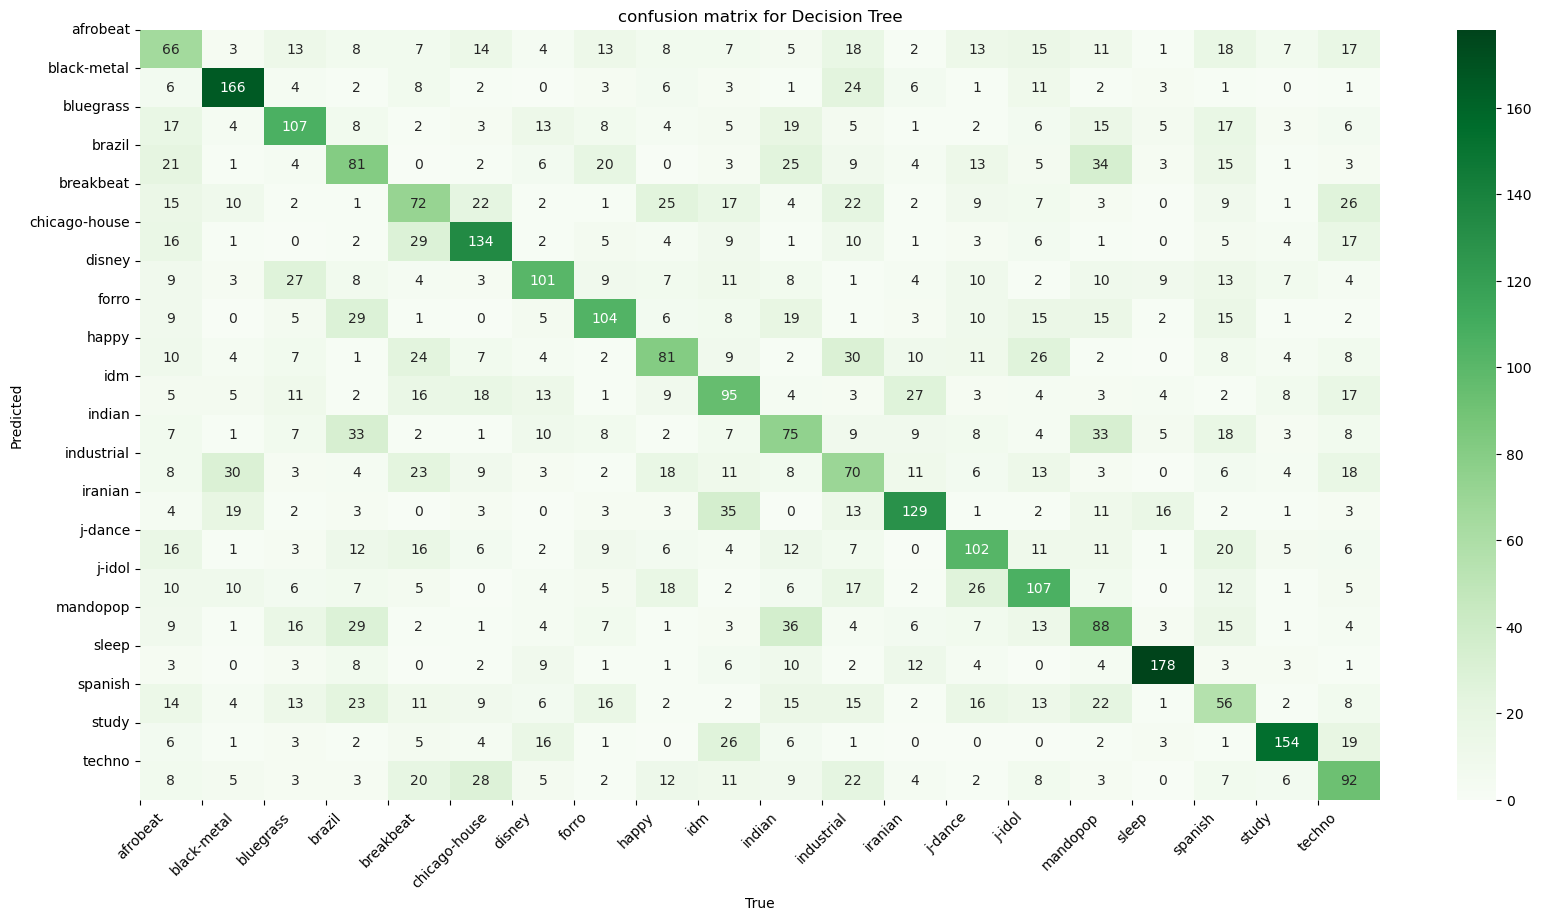

In [67]:
cf = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (20, 10))
sns.heatmap(cf, annot=True, cmap="Greens", fmt=".3g")

plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("confusion matrix for Decision Tree")

plt.xticks(range(len(dt.classes_)), dt.classes_, rotation = 45)
plt.yticks(range(len(dt.classes_)), dt.classes_, rotation = 360)

plt.show()

Feature Importance

In [68]:
dt.feature_importances_

array([0.09724261, 0.00516855, 0.13928052, 0.09730127, 0.06511814,
       0.02460569, 0.08352961, 0.00930847, 0.06915386, 0.09378781,
       0.06444705, 0.04566386, 0.07820656, 0.06352476, 0.00456586,
       0.03075609, 0.02833929])

In [69]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

popularity 0.1392805157462285
danceability 0.09730127431027426
duration_min 0.09724260542420596
acousticness 0.09378781047909414
loudness 0.08352960659369325
valence 0.07820655940355443
speechiness 0.06915385544645948
energy 0.06511814312429576
instrumentalness 0.06444704525734125
tempo 0.06352476337253533
liveness 0.04566386342083895
n_beats 0.030756093417150562
n_bars 0.0283392881982864
key 0.024605692034786377
mode 0.009308471302819952
explicit 0.005168554269807906
time_signature 0.0045658581986275084


In [71]:
default_depth = dt. get_depth()
default_depth

30

### Randomized Search

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [41]:
def eval(clf, X_test, y_train, y_test):
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_test_pred))

    clf.score(X_test, y_test)

    print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
    print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
    print()

    print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
    print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

    print('---------------------------------------------------------------')
    print(classification_report(y_test, y_test_pred))

In [43]:
%%time
param_list = {
    'max_depth': list(np.arange(2, 30)),
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

# default: clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

CPU times: user 31.1 s, sys: 3.96 s, total: 35 s
Wall time: 15min 26s


In [44]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 40, 'min_samples_leaf': 10, 'max_depth': 14, 'criterion': 'gini'} 0.475


<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

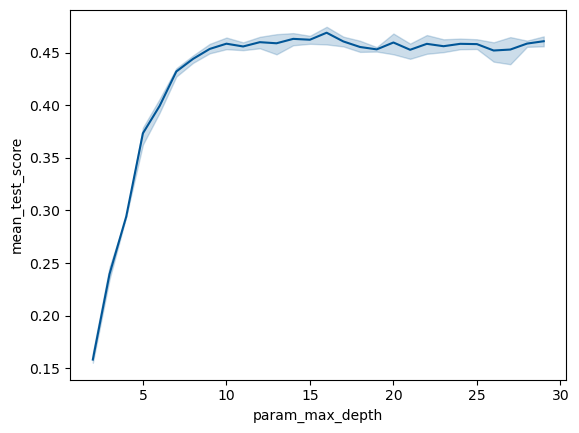

In [46]:
results = pd.DataFrame(random_search.cv_results_)
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score", color = '#015697')

In [15]:
clf_rs = DecisionTreeClassifier(criterion='gini', **random_search.best_params_)
clf_rs.fit(X_train, y_train)

eval(clf_rs, X_test, y_train, y_test)

print("---------------------------------------------------------------")
zipped = zip(attributes, clf_rs.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

Accuracy: 0.464
Train Accuracy 0.5853333333333334
Train F1-score [0.43287671 0.74775928 0.60676923 0.48496481 0.46248295 0.65876153
 0.56619145 0.66047745 0.55275081 0.49846154 0.47537754 0.48512888
 0.70802005 0.57557756 0.60192837 0.53722084 0.83355886 0.42966043
 0.79093851 0.56178051]

Test Accuracy 0.464
Test F1-score [0.25708061 0.66666667 0.46963563 0.35047619 0.29554656 0.57947686
 0.48247423 0.58188825 0.43089431 0.36155606 0.2970297  0.2994012
 0.57754011 0.48995984 0.46783626 0.42372881 0.74895397 0.30339321
 0.71165644 0.46460177]
---------------------------------------------------------------
               precision    recall  f1-score   support

     afrobeat       0.28      0.24      0.26       250
  black-metal       0.65      0.68      0.67       250
    bluegrass       0.48      0.46      0.47       250
       brazil       0.33      0.37      0.35       250
    breakbeat       0.30      0.29      0.30       250
chicago-house       0.58      0.58      0.58       250
 

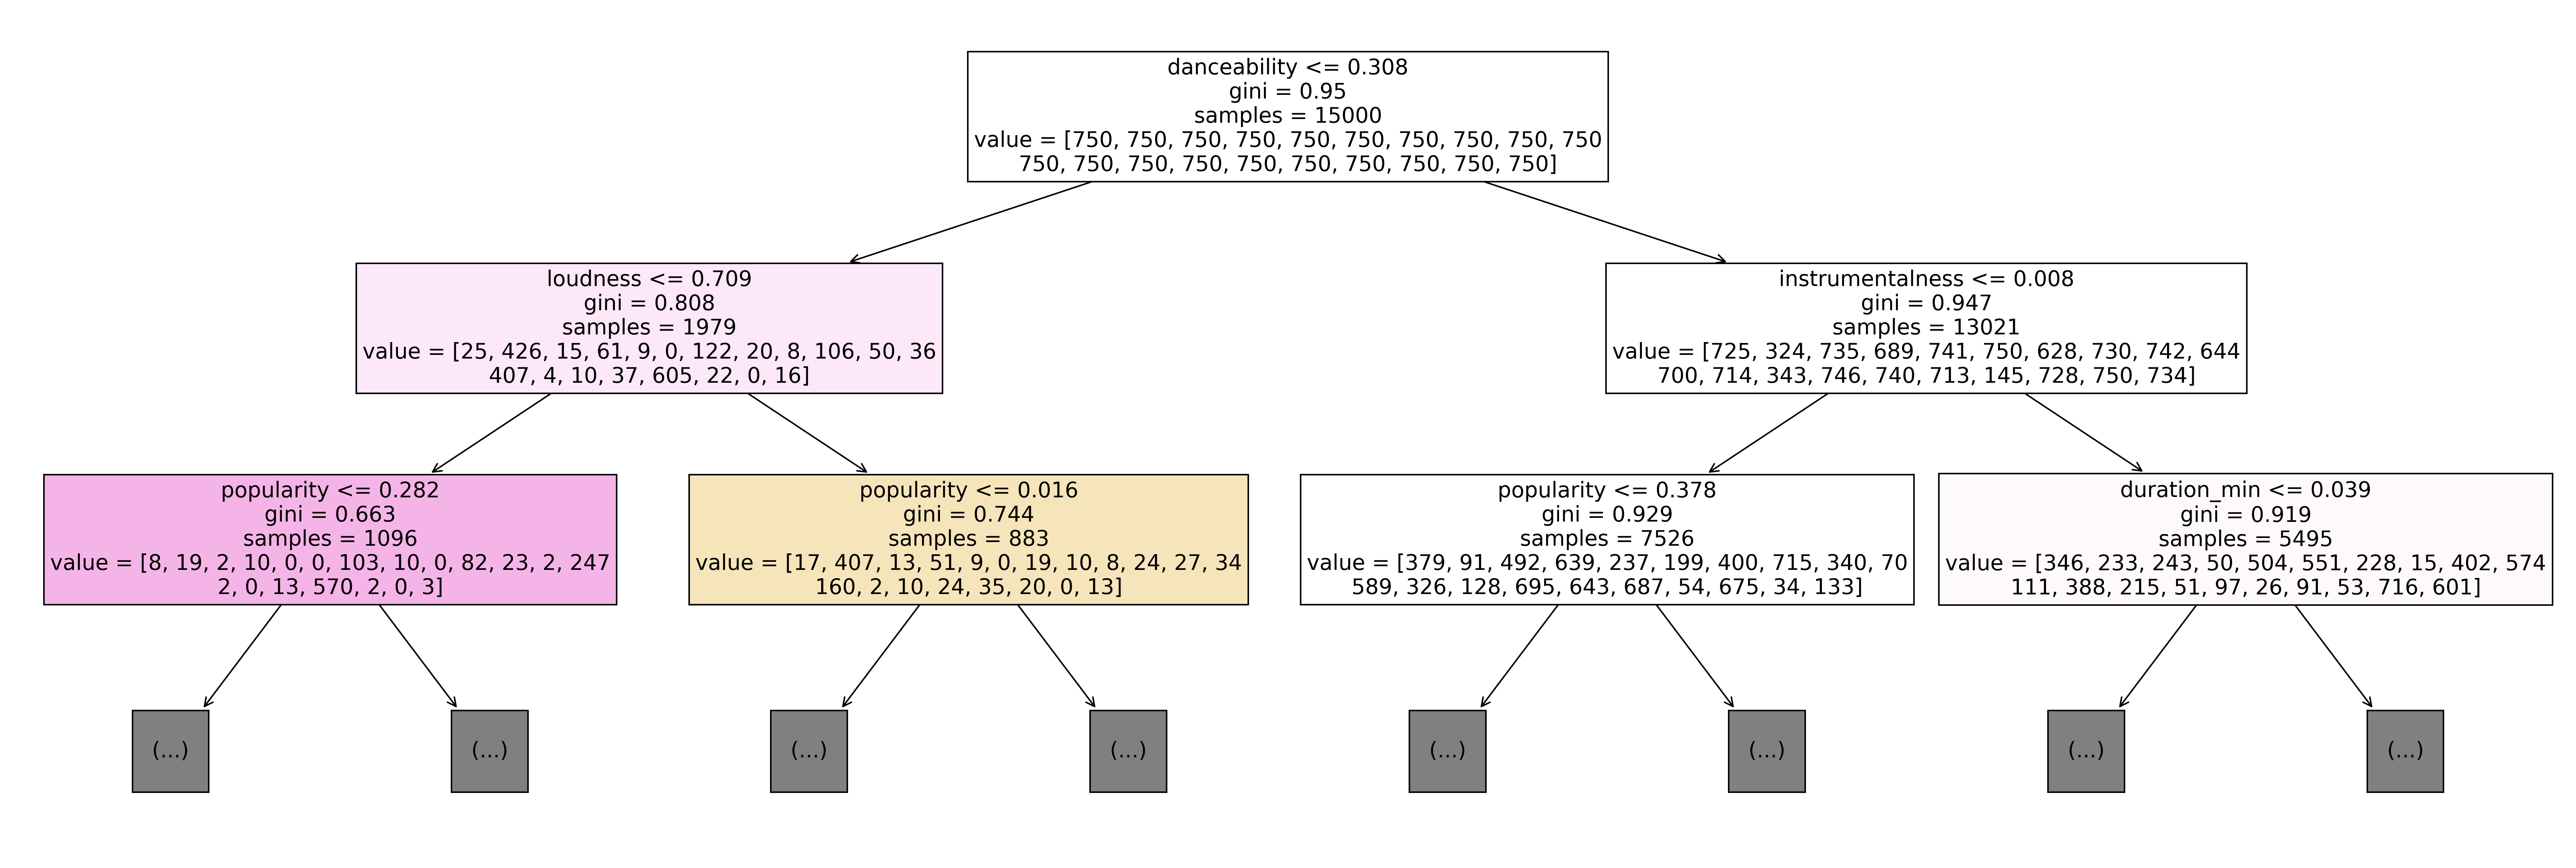

In [103]:
plt.rcdefaults()

plt.figure(figsize=(30, 10), dpi=300)
tree_plot = plot_tree(clf_rs, max_depth = 2, feature_names=attributes, filled=True, fontsize = 14)

plt.show()

**Cost-Complexity Pruning (CCP)**: This method assigns a price to each subtree primarily based on its accuracy and complexity, then selects the subtree with the lowest fee

Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. This algorithm is parameterized by $α >= 0$ known as the complexity parameter. The complexity parameter is used to define the cost-complexity measure, $R_{α}(T)$ of a given tree $T$: $R_{α}(T) = R(T) + α|\tilde{T}|$                         
where 
 - $|\tilde{T}|$is the number of terminal nodes in $T$
 - $R(T)$ is traditionally defined as the total misclassification rate of the terminal nodes. Alternatively, scikit-learn uses the total sample weighted impurity of the terminal nodes for $R(T)$

As shown above, the impurity of a node depends on the criterion. Minimal cost-complexity pruning finds the subtree of $T$ that minimizes $R_{α}(T)$

In [194]:
path = clf_rs.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [196]:
len(ccp_alphas[:-1])

436

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

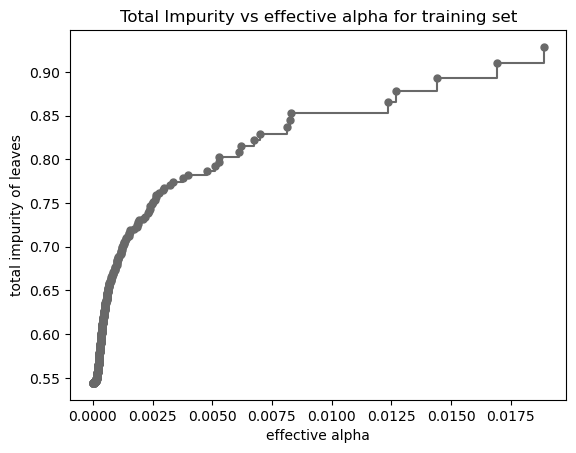

In [197]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", markersize = 5, color = 'dimgrey', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [157]:
clfs = []
for ccp_alpha in ccp_alphas:
    
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)
             
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 7 with ccp_alpha: 0.014419738419204478
Accuracy after pruning: 0.4668


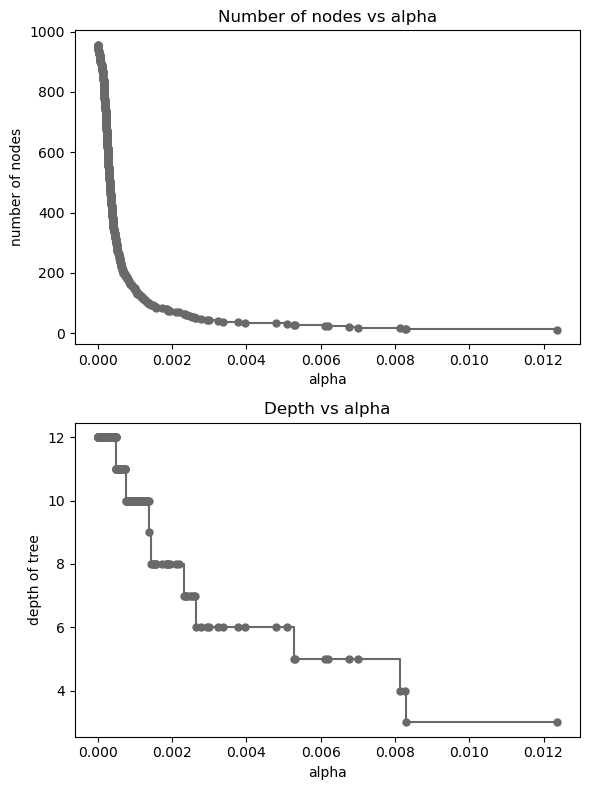

In [190]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize = (6, 8))
ax[0].plot(ccp_alphas, node_counts, marker="o", markersize = 5, color = 'dimgrey', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o",markersize = 5, color = 'dimgrey', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

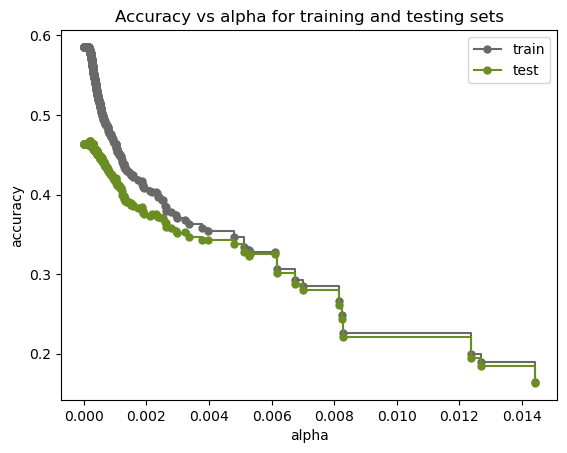

In [188]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", markersize = 5, label="train", drawstyle="steps-post", color = 'dimgrey')
ax.plot(ccp_alphas, test_scores, marker="o", markersize = 5, label="test", drawstyle="steps-post", color = 'olivedrab')
ax.legend()
plt.show()

In [160]:
from sklearn.model_selection import cross_val_score
scores = [cross_val_score(clf, X_train, y_train, cv=10).mean() for clf in clfs]

best_alpha = ccp_alphas[scores.index(max(scores))]
best_alpha

0.000206992337164751

In [9]:
clf_postpruned = DecisionTreeClassifier(ccp_alpha=best_alpha, **random_search.best_params_)
clf_postpruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000206992337164751, max_depth=12,
                       min_samples_leaf=10, min_samples_split=40)

In [18]:
eval(clf_postpruned, X_test, y_train, y_test)

Accuracy: 0.466
Train Accuracy 0.5782666666666667
Train F1-score [0.41762712 0.75165125 0.6014944  0.47486772 0.45566166 0.65492498
 0.56353591 0.65683646 0.55288774 0.49886963 0.45931759 0.47169811
 0.70573409 0.57318741 0.60287081 0.51276102 0.83265857 0.41237113
 0.79093851 0.55661882]

Test Accuracy 0.466
Test F1-score [0.26236559 0.67063492 0.47325103 0.3501006  0.30861723 0.56923077
 0.47798742 0.5859375  0.43673469 0.38580931 0.30314961 0.28846154
 0.57913669 0.51368421 0.49811321 0.41139241 0.73995772 0.2768595
 0.71165644 0.47222222]
---------------------------------------------------------------
               precision    recall  f1-score   support

     afrobeat       0.28      0.24      0.26       250
  black-metal       0.67      0.68      0.67       250
    bluegrass       0.49      0.46      0.47       250
       brazil       0.35      0.35      0.35       250
    breakbeat       0.31      0.31      0.31       250
chicago-house       0.55      0.59      0.57       250
 

In [10]:
y_pred = clf_postpruned.predict(X_test)
report = pd.DataFrame(classification_report(y_test, y_pred,  output_dict=True)).transpose()
report.loc[report['f1-score'].nsmallest(3).index]

,precision,recall,f1-score,support
afrobeat,0.283721,0.244,0.262366,250.0
spanish,0.286325,0.268,0.276860,250.0
industrial,0.277778,0.300,0.288462,250.0


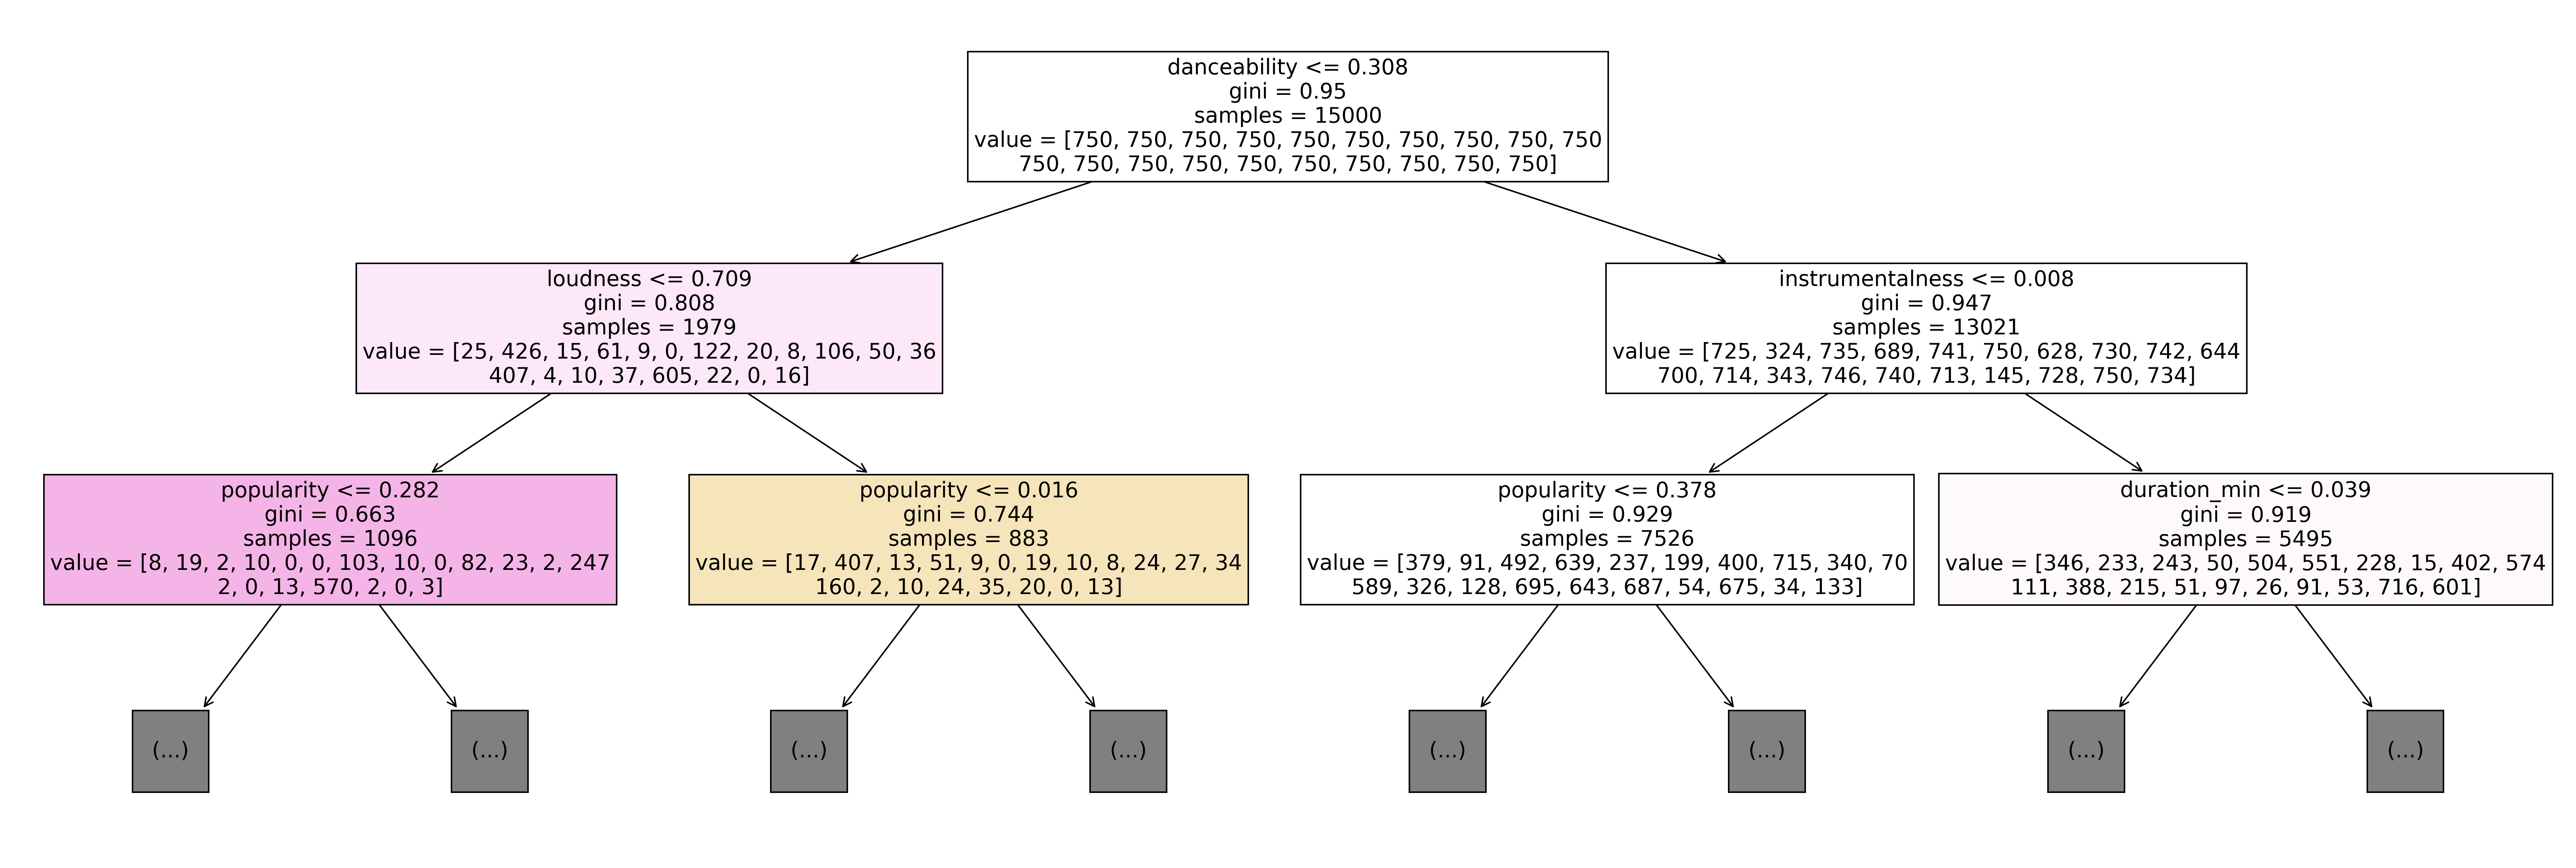

In [173]:
plt.figure(figsize=(30, 10), dpi=300)
plot_tree(clf_postpruned, max_depth = 2, feature_names=attributes, filled=True, fontsize = 14)
plt.show()

In [171]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [259]:
def plot_roc_cust(y_test, y_test_pred_proba, **kargs):
    ax = plot_roc(y_test, y_test_pred_proba, figsize = (10,8), cmap = "binary", plot_micro=False, **kargs)
    
    for line in ax.lines:
        line.set_linewidth(1)
    
    macro = ax.lines[-2]
    macro.set_color('yellowgreen')
    macro.set_linewidth(6)
    
    legend = ax.get_legend()
    legend.legendHandles[-1].set_color('yellowgreen')

    plt.show()

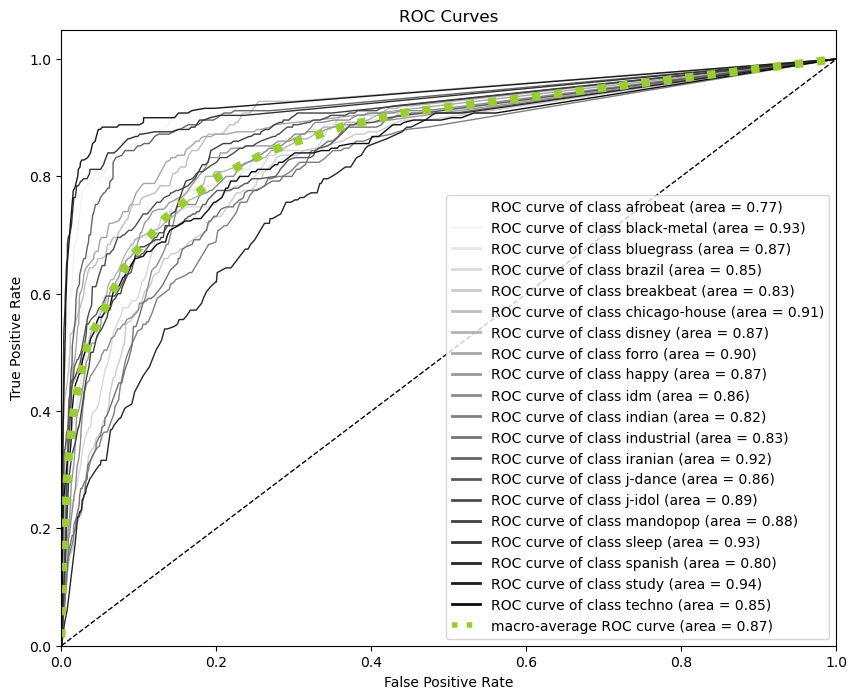

In [174]:
plot_roc_cust(y_test, clf_postpruned.predict_proba(X_test))
plt.show()

In [175]:
roc_auc_score(y_test, clf_postpruned.predict_proba(X_test), multi_class="ovr", average="macro")

0.8681020631578947

### popularity

In [57]:
median_popularity = df_train['popularity'].median()
df_train['popularity_binary'] = (df_train['popularity'] > median_popularity).astype(int)

In [58]:
median_popularity = df_test['popularity'].median()

In [59]:
median_popularity = df_test['popularity'].median()
df_test['popularity_binary'] = (df_test['popularity'] > median_popularity).astype(int)

In [60]:
df_test.head()

,name,duration_min,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,popularity_binary
0,Untrue,0.050947,0,0.359551,Coal Chamber,Chamber Music,0.383,0.951,0,0.875150,...,0.668,0.502470,206827,4.0,0.064532,0.063957,NaN,3.349057,industrial,1
1,High Roller,0.085323,0,0.460674,The Crystal Method,Vegas,0.464,0.579,5,0.755066,...,0.140,0.780404,329733,4.0,0.156721,0.156562,NaN,1.279305,breakbeat,1
2,Na Tum Jano Na Hum (ReVibe),0.031138,0,0.449438,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.778,9,0.851548,...,0.285,0.409049,136000,4.0,0.033523,0.032645,NaN,1.343558,indian,1
3,いじわるなハロー,0.062195,0,0.280899,Perfume,Cling Cling,0.500,0.958,0,0.920753,...,0.955,0.590960,247040,4.0,0.088166,0.087941,NaN,3.349057,j-idol,0
4,Hit The Ceiling,0.051309,0,0.000000,Audio Bullys,Ego War,0.802,0.684,1,0.761679,...,0.637,0.590792,208120,4.0,0.073751,0.073284,NaN,2.367412,breakbeat,0


In [61]:
from sklearn.preprocessing import LabelEncoder

# label encoding Sex feature
le = LabelEncoder()
df_train['genre'] = le.fit_transform(df_train['genre'])

le = LabelEncoder()
df_test['genre'] = le.fit_transform(df_test['genre'])

In [62]:
to_drop = ['name', 'artists', 'album_name', 'popularity', 'popularity_confidence', 'processing','features_duration_ms', 'popularity_binary']
X_train, y_train, X_test, y_test = df_train.drop(columns=to_drop), df_train['popularity_binary'], \
                                    df_test.drop(columns=to_drop), df_test['popularity_binary']   
attributes = X_train.columns

In [63]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#y_train_pred = dt.predict(X_train)
#y_test_pred = dt.predict(X_test)

eval(dt, X_test, y_train, y_test)

Accuracy: 0.661
Train Accuracy 0.9992666666666666
Train F1-score [0.99926857 0.99926476]

Test Accuracy 0.661
Test F1-score [0.6657464  0.65611686]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.65      0.67      2594
           1       0.64      0.67      0.66      2406

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.66      5000
weighted avg       0.66      0.66      0.66      5000



In [244]:
%%time

default_depth = dt.get_depth()
param_list = {
    'max_depth': list(np.arange(2, default_depth)),
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

# default: clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

CPU times: user 16.9 s, sys: 3.34 s, total: 20.2 s
Wall time: 4min 43s


In [245]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 40, 'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'entropy'} 0.7252466666666666


<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

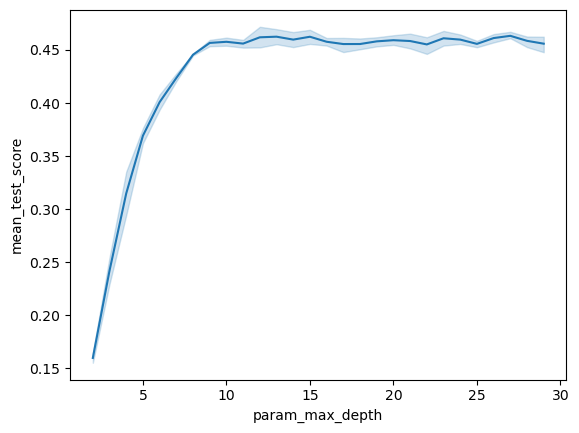

In [227]:
sns.lineplot(data=results, x="param_max_depth", y="mean_test_score")

In [37]:
clf_rs = DecisionTreeClassifier(**random_search.best_params_)
clf_rs.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=40)

In [38]:
eval(clf_rs, X_test, y_train, y_test)

print("---------------------------------------------------------------")
zipped = zip(attributes, clf_rs.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

Accuracy: 0.732
Train Accuracy 0.7648
Train F1-score [0.77004302 0.75931232]

Test Accuracy 0.732
Test F1-score [0.74466463 0.71801347]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      2594
           1       0.73      0.71      0.72      2406

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000

---------------------------------------------------------------
genre 0.4530617686328309
instrumentalness 0.22094619535411097
speechiness 0.07357787745077132
acousticness 0.056849687906278534
danceability 0.04961692251240369
duration_min 0.03553679531084071
valence 0.030761539834458097
loudness 0.030684980247379604
tempo 0.01532230150016353
energy 0.013141541941106805
n_beats 0.008738320270998055
n_bars 0.007039054592405415
liveness 0.0038365862365682367
explicit 0.000

### ccp

In [248]:
path = clf_rs.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

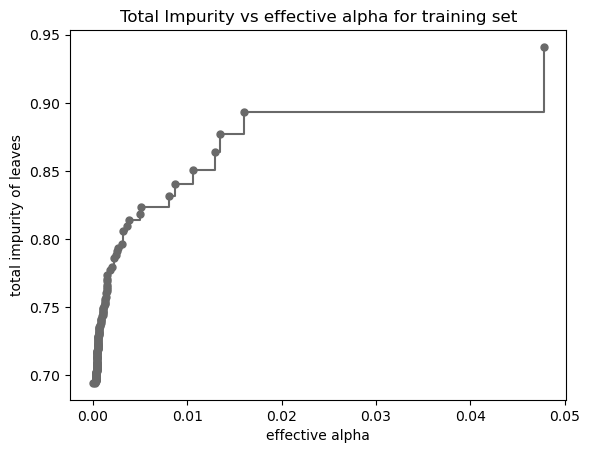

In [249]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", markersize = 5, color = 'dimgrey', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [250]:
random_search.best_params_

{'min_samples_split': 40,
 'min_samples_leaf': 1,
 'max_depth': 8,
 'criterion': 'entropy'}

In [251]:
clfs = []
for ccp_alpha in tqdm(ccp_alphas):
    
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, **random_search.best_params_)
    clf.fit(X_train, y_train)
    clfs.append(clf)
             
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

100%|█████████████████████████████████████████| 128/128 [00:17<00:00,  7.47it/s]

Number of nodes in the last tree is: 1 with ccp_alpha: 0.058935644342720805


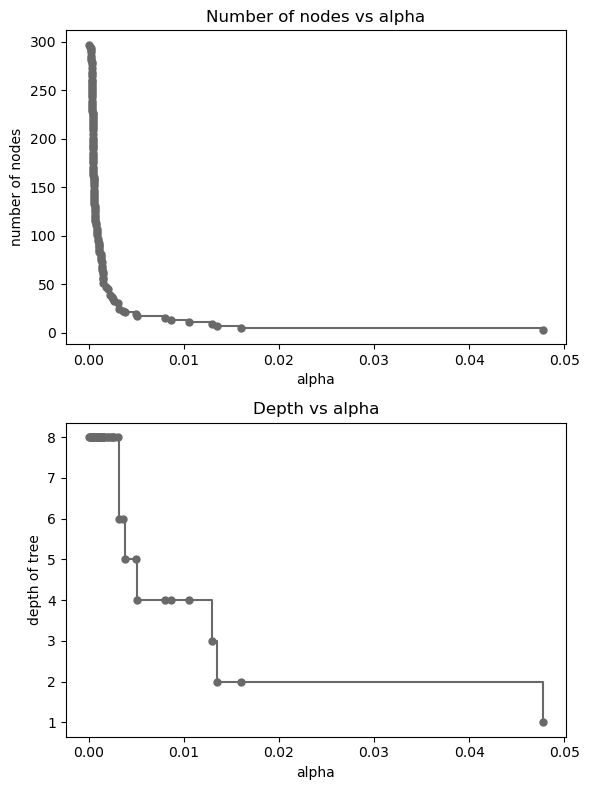

In [254]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize = (6, 8))
ax[0].plot(ccp_alphas, node_counts, marker="o", markersize = 5, color = 'dimgrey', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o",markersize = 5, color = 'dimgrey', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

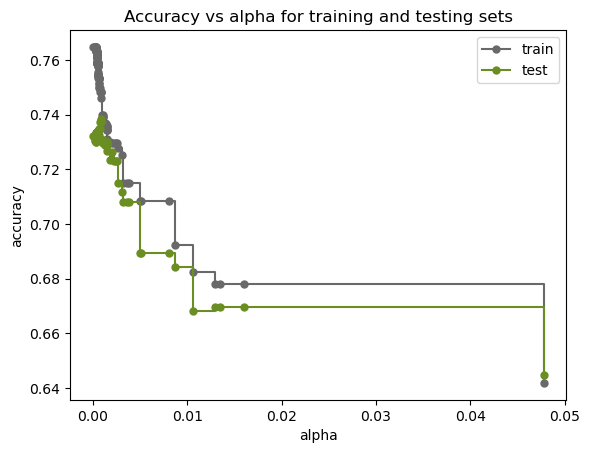

In [255]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", markersize = 5, label="train", drawstyle="steps-post", color = 'dimgrey')
ax.plot(ccp_alphas, test_scores, marker="o", markersize = 5, label="test", drawstyle="steps-post", color = 'olivedrab')
ax.legend()
plt.show()

In [252]:
from sklearn.model_selection import cross_val_score
scores = [cross_val_score(clf, X_train, y_train, cv=10).mean() for clf in tqdm(clfs)]

best_alpha = ccp_alphas[scores.index(max(scores))]
best_alpha

100%|█████████████████████████████████████████| 128/128 [02:29<00:00,  1.17s/it]


0.0005837565207785778

In [67]:
clf_postpruned = DecisionTreeClassifier(ccp_alpha=best_alpha, **random_search.best_params_)
clf_postpruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0005837565207785778, criterion='entropy',
                       max_depth=8, min_samples_split=40)

In [68]:
eval(clf_postpruned, X_test, y_train, y_test)

Accuracy: 0.7322
Train Accuracy 0.754
Train F1-score [0.75910693 0.74867184]

Test Accuracy 0.7322
Test F1-score [0.74304356 0.72040092]
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      2594
           1       0.72      0.72      0.72      2406

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000



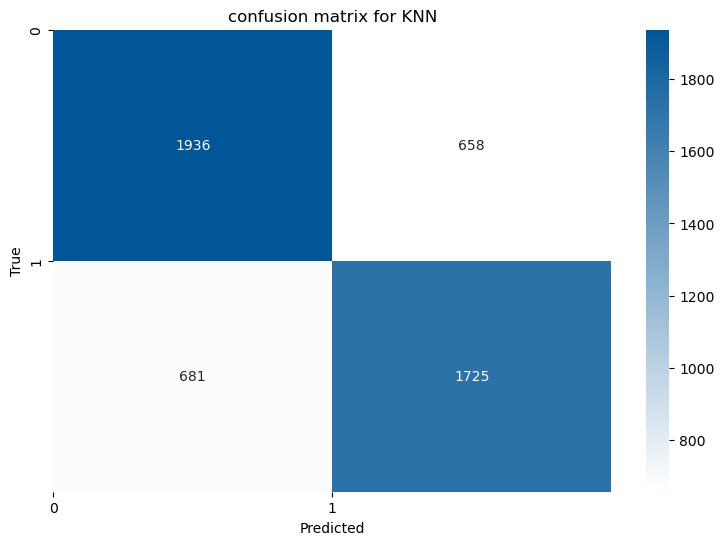

In [80]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np

cmap = clr.LinearSegmentedColormap.from_list('custom_map', ['white', '#015697'], N=256)

y_pred = clf_postpruned.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (9, 6))
sns.heatmap(cf, annot=True, cmap=cmap, fmt="g")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("confusion matrix for KNN")

plt.xticks(range(len(clf_postpruned.classes_)), clf_postpruned.classes_)#, rotation = 45)
plt.yticks(range(len(clf_postpruned.classes_)), clf_postpruned.classes_)#, rotation = 360)

plt.show()

In [ ]:
    ax = plot_roc(y_test, y_test_pred_proba, figsize = (10,8), cmap = "binary", plot_micro=False, **kargs)
    
    for line in ax.lines:
        line.set_linewidth(1)
    
    macro = ax.lines[-2]
    macro.set_color('yellowgreen')
    macro.set_linewidth(6)
    
    legend = ax.get_legend()
    legend.legendHandles[-1].set_color('yellowgreen')

    plt.show()

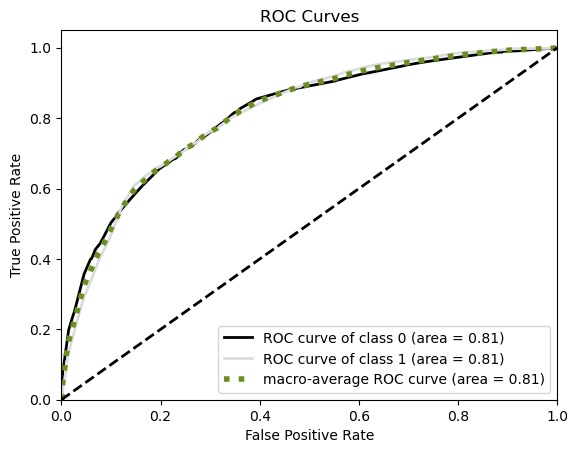

In [267]:
ax=plot_roc(y_test, clf_postpruned.predict_proba(X_test), plot_micro=False)

ax.lines[0].set_color('black')
ax.lines[1].set_color('gainsboro')

macro = ax.lines[-2]
macro.set_color('olivedrab')

legend = ax.get_legend()
legend.legendHandles[-1].set_color('olivedrab')
legend.legendHandles[0].set_color('black')
legend.legendHandles[1].set_color('gainsboro')

plt.show()